In [1]:
from util import ThreadedVideoCamera
import pickle
import numpy as np
import PIL
import matplotlib.pyplot as pp
from collections import deque
import cv2
import time

In [2]:
camera = ThreadedVideoCamera(1)

In [7]:
def get_diff(image, background, threshold=0.05):
    delta = np.abs((np.array(image) / 255.) - (np.array(background) / 255.))
    delta_zero = delta < threshold
    delta[delta_zero] = 0
    return delta

def write_video(name, capture, frame_rate=15, codec='DIVX'):
    height, width, layers = np.array(capture[-1]).shape
    writer = cv2.VideoWriter(name, cv2.VideoWriter_fourcc(*codec), frame_rate, (width, height))
    for frame in capture:
        writer.write(np.array(frame))
    writer.release()

def initialize(camera):
    memory = deque()
    for image in camera.images():
        memory.append(image)
        break

    for image in camera.images():
        if len(memory) > 10:
            break
        else:
            if np.any(get_diff(image, memory[-1]) > 0):
                memory.append(image)
    capture = [memory[-1]]
    return memory, capture
            
memory, capture = initialize(camera)
threshold = 0.001 * memory[-1].size[0] * memory[-1].size[1]
time_of_last_capture = time.time()
for image in camera.images():
    try:
        background = np.array([np.array(memory_image) for memory_image in memory]).mean(axis=0).astype(int)
        background_anomalous_count = (get_diff(image, background) > 0.05).sum()
        captured_stream_change = (get_diff(capture[-1], image) > 0).sum()
        
        if background_anomalous_count > threshold and  captured_stream_change > 0:
            capture.append(image)
            time_of_last_capture = time.time()
        else:
            if len(capture) > 50 and time.time() - time_of_last_capture > 5:
                print('writing out video.')
                write_video('{}.avi'.format(time.time()), capture, frame_rate=30)
                capture = [image]
            memory.append(image)
            memory.popleft()
    except KeyboardInterrupt:
        break


writing out video.
writing out video.


In [8]:
0.01 * image.size[0] * image.size[1]

3072.0

In [17]:
write_video('test.avi', capture, frame_rate=30)

In [4]:
len(capture)

1

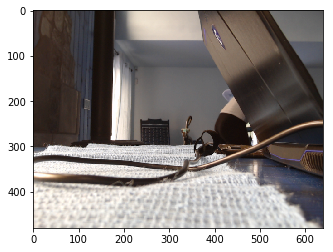

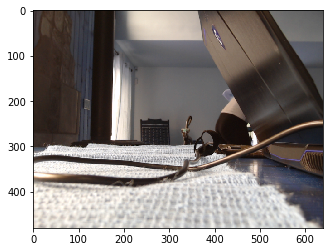

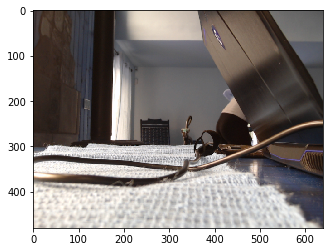

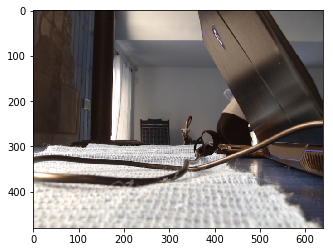

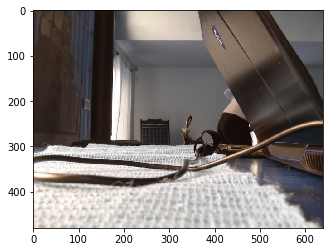

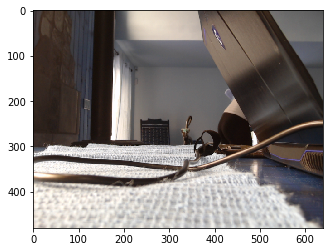

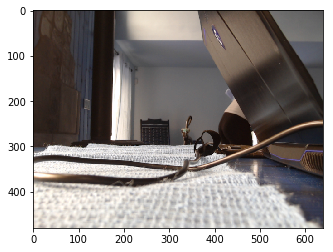

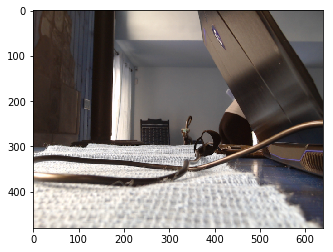

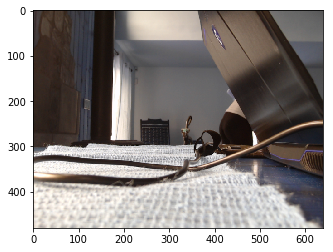

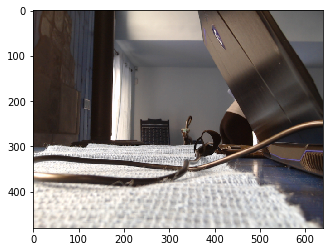

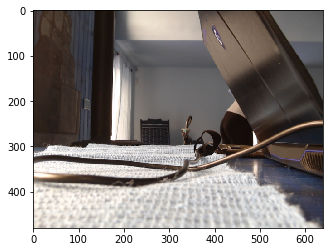

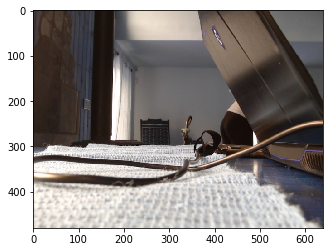

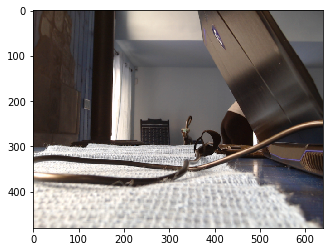

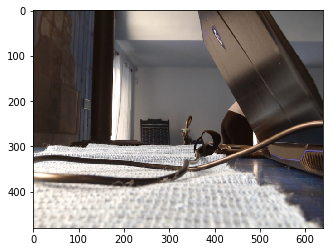

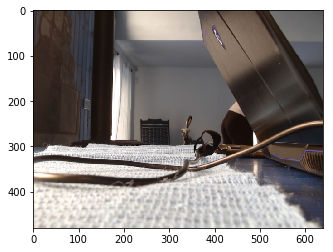

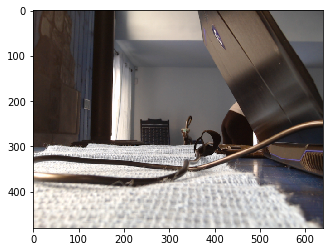

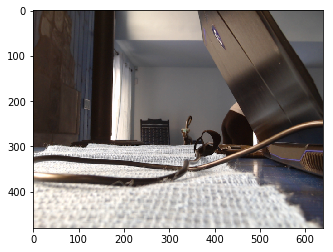

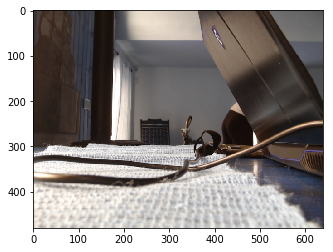

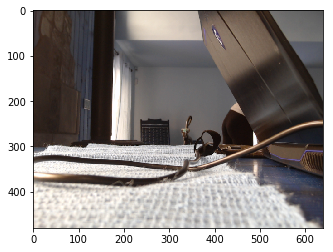

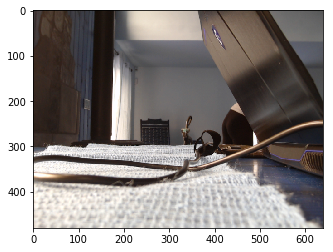

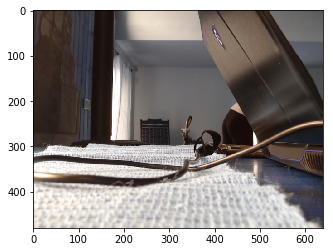

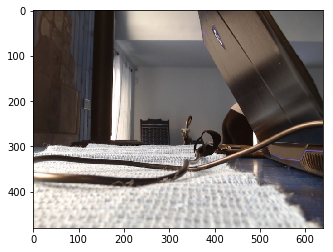

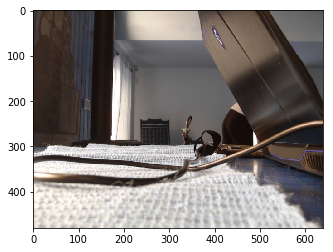

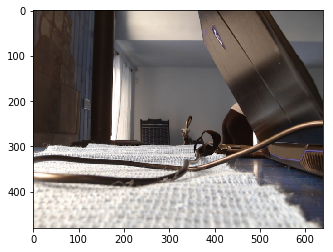

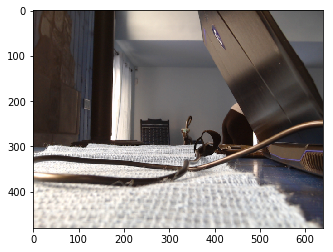

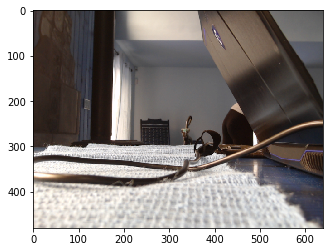

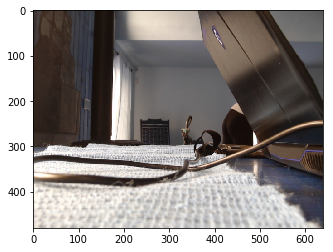

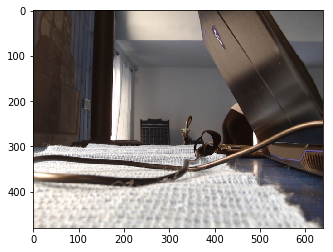

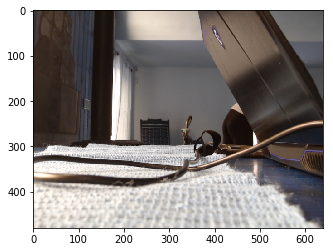

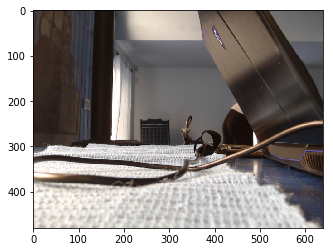

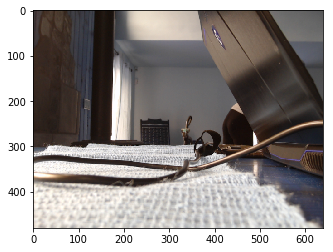

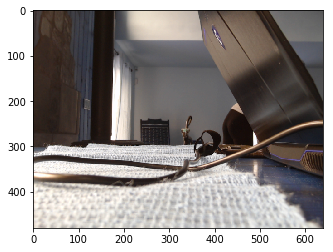

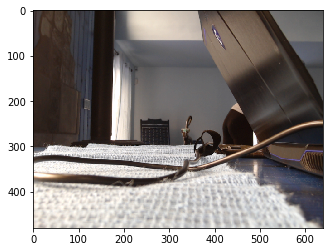

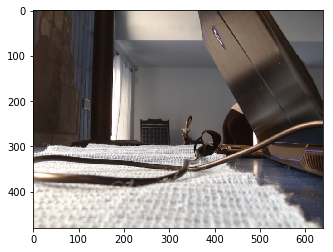

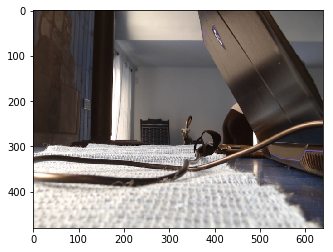

KeyboardInterrupt: 

In [12]:
for image in capture:
    pp.imshow(image)
    pp.show()

In [6]:
del capture

In [10]:
writer = cv2.VideoWriter('project.avi', 
                         cv2.VideoWriter_fourcc(*'DIVX'), 
                         15, 
                         np.array(capture[-1]).shape[0:2])

for frame in capture:
    writer.write(np.array(frame))
writer.release()

In [34]:
ls

Dockerfile   __pycache__/      run.sh*     util.py
project.avi  requirements.txt  test.ipynb  video_producer.py


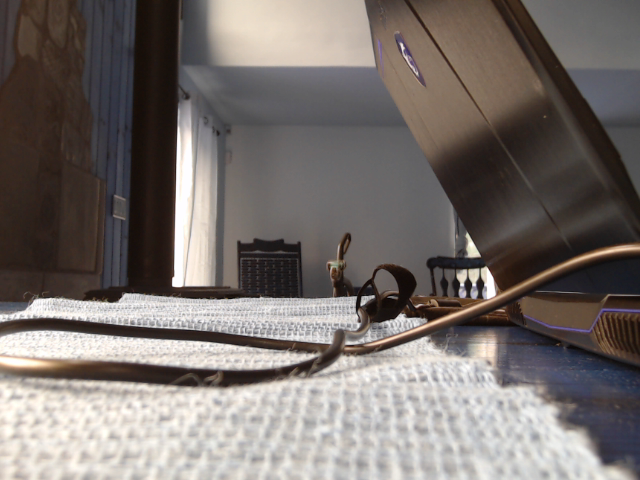

In [5]:
capture[-1]

In [6]:
np.array(capture[0]).shape

(480, 640, 3)

In [6]:
rm *.avi